In [4]:
#设计并实现一个用于回归任务的全连接神经网络，其结构如下：

#输入层：10 个神经元
#（对应每个样本的 10 维特征）

#隐藏层 1：7 个神经元，激活函数使用 ReLU

#隐藏层 2：5 个神经元，激活函数使用 Tanh

#输出层：1 个神经元，输出为一个标量（不经过激活函数，因为回归任务的输出通常直接为线性值）

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [6]:
class SimpleNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(10, 7)
    self.layer2 = nn.Linear(7, 5)
    self.layer3 = nn.Linear(5, 1)

  def forward(self, x):
    x = torch.relu(self.layer1(x))
    x = torch.tanh(self.layer2(x))
    x = self.layer3(x)
    return x

epoch: 1 loss: 1.3741
epoch: 11 loss: 1.1490
epoch: 21 loss: 1.0241
epoch: 31 loss: 0.9498
epoch: 41 loss: 0.9010
epoch: 51 loss: 0.8651
epoch: 61 loss: 0.8358
epoch: 71 loss: 0.8100
epoch: 81 loss: 0.7856
epoch: 91 loss: 0.7615
epoch: 101 loss: 0.7371
epoch: 111 loss: 0.7117
epoch: 121 loss: 0.6847
epoch: 131 loss: 0.6557
epoch: 141 loss: 0.6245
epoch: 151 loss: 0.5911
epoch: 161 loss: 0.5555
epoch: 171 loss: 0.5179
epoch: 181 loss: 0.4782
epoch: 191 loss: 0.4367
epoch: 201 loss: 0.3948
epoch: 211 loss: 0.3535
epoch: 221 loss: 0.3145
epoch: 231 loss: 0.2778
epoch: 241 loss: 0.2441
epoch: 251 loss: 0.2137
epoch: 261 loss: 0.1868
epoch: 271 loss: 0.1637
epoch: 281 loss: 0.1438
epoch: 291 loss: 0.1267
epoch: 301 loss: 0.1120
epoch: 311 loss: 0.0994
epoch: 321 loss: 0.0884
epoch: 331 loss: 0.0788
epoch: 341 loss: 0.0704
epoch: 351 loss: 0.0628
epoch: 361 loss: 0.0561
epoch: 371 loss: 0.0502
epoch: 381 loss: 0.0448
epoch: 391 loss: 0.0401
epoch: 401 loss: 0.0359
epoch: 411 loss: 0.0321
epo

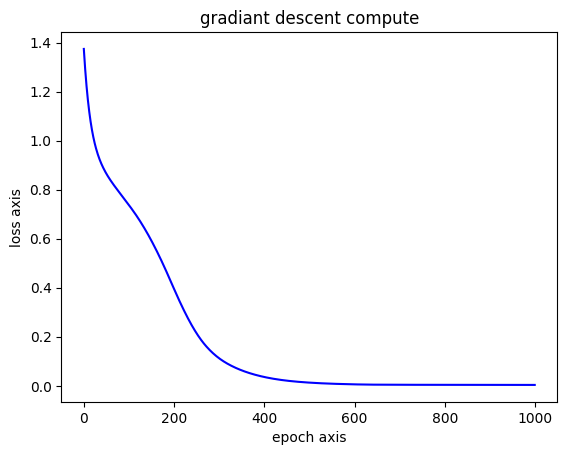

In [7]:
#数据准备：

#随机生成一个输入数据张量 x，形状为 (16, 10) ，即 16 个样本，每个样本 10 维特征（使用 torch.randn 即可）。

#随机生成目标输出 y，形状为 (16, 1) ，由 torch.randn 生成。
x = torch.randn(16, 10)
y_true = torch.randn(16, 1)

model = SimpleNN()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr =0.01)

epochs = 1000
losses = []

for epoch in range(epochs):
  y_pred = model(x)

  loss = criterion(y_pred, y_true)
  losses.append(loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch%10 == 0:
    print(f"epoch: {epoch + 1}",
      f"loss: {loss.item():.4f}")


final_prediction = model(x)
print("\n the final value is:")
print(final_prediction)

y_pred = torch.argmax(final_prediction, dim=1)
print("\n the final prediction index is:")
print(y_pred)

print("\n the true value index is:")
print(y_pred)

plt.plot(range(epochs), losses, "blue")
plt.xlabel("epoch axis")
plt.ylabel("loss axis")
plt.title("gradiant descent compute")
plt.show()